## IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn


## DATA LOADING

In [3]:
#loading dataset
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\inmind.ai\AI_PART\NLP\Reviews.csv",index_col=0)

In [4]:
data.shape

(568454, 9)

## DATA CLEANING

In [5]:
data.isnull().sum().sort_values(ascending=False)

Summary                   27
ProfileName               26
ProductId                  0
UserId                     0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Text                       0
dtype: int64

In [6]:
data.dropna(inplace=True)


In [7]:
data.isnull().sum().sort_values(ascending=False)

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
data.shape

(568401, 9)

In [9]:
data.head(2)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [10]:

final=data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(393914, 9)

In [11]:
#histogram:
ax=final['Score'].value_counts().sort_index()
ax

Score
1     36303
2     20800
3     29767
4     56093
5    250951
Name: count, dtype: int64

## DATA VISUALIZATION

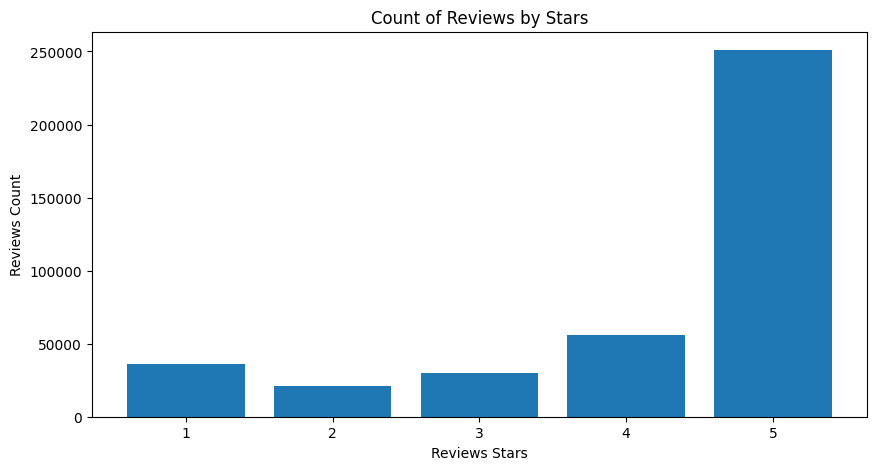

In [12]:

fig, ax = plt.subplots(figsize=(10, 5))

# Count the occurrences of each unique value in 'stars' column
star_counts = final['Score'].value_counts().sort_index()

# Create a bar plot
ax.bar(star_counts.index, star_counts, width=0.8, align='center')

# Set labels and title
ax.set_title('Count of Reviews by Stars')
ax.set_xlabel('Reviews Stars')
ax.set_ylabel('Reviews Count')

# Optional: Set x-axis ticks to match the unique values in 'stars'
ax.set_xticks(star_counts.index)

plt.show()

In [13]:
#create label column:
def partition(x):
  if x <= 3 :
    return 0 
  return 1

final['Label'] = final['Score'].apply(partition)
#final['Label'] = final['Score'].apply(lambda x: 0 if x <= 3 else 1)#we can use this way too instead of the def function apart everything inside lambda


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27176\1437096384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Label'] = final['Score'].apply(partition)


In [14]:
final['Label'].value_counts()

Label
1    307044
0     86870
Name: count, dtype: int64

In [15]:
final.head(2)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
Id,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0


## TEXT PREPROCESSING

In [16]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [17]:
import re
def decontract_word(phrase):
    # Replace contractions based on the dictionary
    for contraction, expansion in contractions.items():
        phrase = re.sub(contraction, expansion, phrase)
    return phrase

In [18]:
#example to check the function decontracted
print(decontract_word("This isn't the worst thing ever."))

This is not the worst thing ever.


In [19]:
#punctuation:
#URLS, hmtl style links, &amp, special charcters, <br />
from html import unescape

def text_cleaning(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)#Removes URLs by replacing them with an empty string.
    
    # Remove HTML-style links
    text = re.sub(r'<a\b[^>]*>(.*?)</a>', '', text)# Removes HTML-style links by replacing them with an empty string.
    
    # Remove HTML tags and entities
    text = re.sub(r'<.*?>', '', text)#Removes HTML tags by replacing them with an empty string.
    text = unescape(text)# Unescapes HTML entities, converting &amp; to &, for example.
    
    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)#Removes special characters by replacing them with an empty string.
    
    # Remove <br /> tags
    text = re.sub(r'<br\s*/?>', ' ', text)#Replaces <br /> tags with a space.
    
    return text

In [20]:
#example to check the function text_cleaning
input_text = "Visit my website <a href='http://example.com'>here</a>. &amp; This is a <br /> sample text!"
processed_text = text_cleaning(input_text)
print(processed_text)

Visit my website  sample text


In [21]:
#stopwords after thelowering
#we are removing the words from the stop words list: no', 'nor', 'not in my function to avoid drawbacks

from nltk.corpus import stopwords
import re

# Modify the stop words set
stop = set(stopwords.words('english'))
stop.discard('no')
stop.discard('nor')
stop.discard('not')

def stop_words(phrase, replacement=""):
    # Replace stopwords in the phrase
    for stopword in stop:
        phrase = re.sub(rf'\b{stopword}\b', replacement, phrase)
        # Replace consecutive spaces with a single space
        phrase = re.sub(r'\s+', ' ', phrase).strip()
    return phrase


In [22]:

input = "Visit my website is not <a href='http://example.com'>here</a>. &amp; This is a <br /> sample text!"
output= stop_words(input)
print(output)
    

Visit website not < href='http://example.com'></>. &amp; This <br /> sample text!


In [23]:
from tqdm import tqdm
import nltk
def clean_text(sentence):
    sentence=sentence.lower()
    sentence =text_cleaning(sentence)
    sentence = decontract_word(sentence)
    sentence=stop_words(sentence)
    sentence =nltk.WordPunctTokenizer().tokenize(sentence)
    sentence = ' '.join(sentence)  # Join tokens into a sentence
    return sentence



In [24]:
input = "Visit my not no is website <a href='http://example.com'>here</a>. &amp; This is a <br /> sample text!"
output= clean_text(input)
print(output)
    

visit not no website sample text


In [25]:

def using_tqdm(data_series):
    cleaned_data = []
    for sentence in tqdm(data_series):
        cleaned_data.append(clean_text(sentence))
    return cleaned_data



In [26]:
final['Text_Cleaned'] = using_tqdm(final['Text'])
final.head()

100%|██████████| 393914/393914 [45:12<00:00, 145.21it/s] 
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27176\1714690229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_Cleaned'] = using_tqdm(final['Text'])


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,Text_Cleaned
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...


In [27]:
final['Text_Cleaned'].iloc[1]

'product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted not sure error vendor intended represent product jumbo'

In [28]:

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define lemmatization function with part-of-speech information
def lemmatization(sentence):
    # Tokenize the sentence
    words = word_tokenize(sentence)
    
    # Part-of-speech tagging
    pos_tags = pos_tag(words)
    
    # Lemmatize with specified part-of-speech
    lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    # Join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    
    return lemmatized_sentence

# Helper function to map POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return 'n'  # noun
    elif tag.startswith('V'):
        return 'v'  # verb
    elif tag.startswith('R'):
        return 'r'  # adverb
    elif tag.startswith('J'):
        return 'a'  # adjective
    else:
        return 'n'  # default to noun




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# Example sentence
sentence = "The cats are running in the garden"

# Lemmatize with specified part-of-speech
output_sentence = lemmatization(sentence)

print(output_sentence)

The cat be run in the garden


In [30]:
def using_lem(data_series):
    lemmitized_data = []
    for sentence in tqdm(data_series):
        lemmitized_data.append(lemmatization(sentence))
    return lemmitized_data



In [31]:
final['Text_Lemmatized'] = using_lem(final['Text_Cleaned'])
final.head()

100%|██████████| 393914/393914 [20:52<00:00, 314.54it/s]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27176\1835802924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_Lemmatized'] = using_lem(final['Text_Cleaned'])


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,Text_Cleaned,Text_Lemmatized
Id,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...,buy several vitality can dog food product find...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...,product arrive labeled jumbo salt peanutsthe p...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...,confection around century light pillowy citrus...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...


In [32]:
#handling the inmbalanced datset inML
final['Label'].value_counts()

Label
1    307044
0     86870
Name: count, dtype: int64

In [33]:
count_class_1,count_class_0 =final.Label.value_counts()

df_class_0=final[final['Label']==0]
df_class_1=final[final['Label']==1]

In [34]:
count_class_0, count_class_1

(86870, 307044)

In [35]:
df_class_0.shape

(86870, 12)

In [36]:
df_class_1.shape

(307044, 12)

In [37]:
df_class_1_under=df_class_1.sample(count_class_0)
df_class_1_under.shape

(86870, 12)

In [38]:
df_test_under_s=pd.concat([df_class_1_under,df_class_0],axis=0)

In [39]:
df_test_under_s.shape

(173740, 12)

In [40]:
print('random under-sampling')
print(df_test_under_s.Label.value_counts())

random under-sampling
Label
1    86870
0    86870
Name: count, dtype: int64


In [41]:
df_test_under_s.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,Text_Cleaned,Text_Lemmatized
Id,,,,,,,,,,,,
129209,B001ET5Y1G,A5W8TSQ7L40Q5,"Sandy M. Moschetti ""Sandy in Benton City, WA""",0,0,5,1273968000,dog cookies,When I ordered this product I received free sh...,1,ordered product received free shipping since a...,ordered product receive free shipping since ad...
228608,B000S6905M,A1RTSGY2749P9Z,David Gurgel,0,0,4,1331942400,"Easy Prep, Tasty, a Touch of the Mediterranean",Bring 1-1/4 cup of water to a boil. Add packag...,1,bring 114 cup water boil add package simmer te...,bring 114 cup water boil add package simmer te...
290883,B005HG9ESG,A3CA3RWZYJDWXE,BJ Fraser,0,0,4,1345680000,H 2 Oh!,I don't think there's a lot you can say about ...,1,dont think theres lot say product bottled wate...,dont think there lot say product bottled water...
133071,B0090X8IPM,ASD7LAINVLNHC,Skylark Thibedeau,0,0,5,1292371200,One of Starbucks Finest Blends,You cut open the bag and are drenched with the...,1,cut open bag drenched pleasing aroma rich coff...,cut open bag drench please aroma rich coffee h...
67350,B004JRXZKM,A1U208VXZ6J5HA,"L. Alfieri ""Lou""",0,0,5,1350432000,zero-calorie filler,I have been eating these for months. I also en...,1,eating months also enjoy kelp noodles low not ...,eat month also enjoy kelp noodle low not zero ...


In [ ]:
#another way:Using scratch modl Word2Vec

In [42]:
# final_copy = df_test_under_s.copy()
# final_copy.head()
final_copy = final.copy()
final_copy.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,Text_Cleaned,Text_Lemmatized
Id,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...,buy several vitality can dog food product find...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...,product arrive labeled jumbo salt peanutsthe p...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...,confection around century light pillowy citrus...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...


In [43]:
final_copy['Label'].value_counts()

Label
1    307044
0     86870
Name: count, dtype: int64

In [44]:
final_copy['Label'].shape

(393914,)

In [45]:
final_copy.shape

(393914, 12)

In [46]:
#take dataset and create a word2vec from scratch:
# Create a list of lemmatized sentences
# Assuming 'Text_Lemmatized' is the column containing lemmatized text
corpus = []

for sentence in tqdm(final_copy['Text_Lemmatized'].values):
    # Further processing if needed
    processed_sentence = sentence.strip()  # Remove leading and trailing whitespaces
    
    # Append the processed sentence to the corpus array
    corpus.append(processed_sentence)

100%|██████████| 393914/393914 [00:00<00:00, 2225970.00it/s]


In [47]:
len(corpus)

393914

In [48]:
corpus

['buy several vitality can dog food product find good quality product look like stew process meat smell well labrador finicky appreciate product well',
 'product arrive labeled jumbo salt peanutsthe peanut actually small size unsalted not sure error vendor intend represent product jumbo',
 'confection around century light pillowy citrus gelatin nut case filberts cut tiny square liberally coat powdered sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund sell brother sister witch',
 'look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal',
 'get wild hair taffy order five pound bag taffy enjoyable many flavor watermelon root beer melon peppermint grape etc complaint bit much redblack licoriceflavored piece not particular favorite kid husband last t

In [49]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
# words=[]
# for sent in corpus:
#     sent_token=sent_tokenize(sent)
#     for sent in sent_token:
#         words.append((sent))
from nltk.tokenize import sent_tokenize, word_tokenize

# corpus_lengths = [len(sent_tokenize(sent)) for sent in corpus]
word_lengths = [word_tokenize(sent) for sent in corpus]

In [50]:
len(word_lengths)

393914

In [51]:
word_lengths

[['buy',
  'several',
  'vitality',
  'can',
  'dog',
  'food',
  'product',
  'find',
  'good',
  'quality',
  'product',
  'look',
  'like',
  'stew',
  'process',
  'meat',
  'smell',
  'well',
  'labrador',
  'finicky',
  'appreciate',
  'product',
  'well'],
 ['product',
  'arrive',
  'labeled',
  'jumbo',
  'salt',
  'peanutsthe',
  'peanut',
  'actually',
  'small',
  'size',
  'unsalted',
  'not',
  'sure',
  'error',
  'vendor',
  'intend',
  'represent',
  'product',
  'jumbo'],
 ['confection',
  'around',
  'century',
  'light',
  'pillowy',
  'citrus',
  'gelatin',
  'nut',
  'case',
  'filberts',
  'cut',
  'tiny',
  'square',
  'liberally',
  'coat',
  'powdered',
  'sugar',
  'tiny',
  'mouthful',
  'heaven',
  'not',
  'chewy',
  'flavorful',
  'highly',
  'recommend',
  'yummy',
  'treat',
  'familiar',
  'story',
  'c',
  'lewis',
  'lion',
  'witch',
  'wardrobe',
  'treat',
  'seduces',
  'edmund',
  'sell',
  'brother',
  'sister',
  'witch'],
 ['look',
  'secret',

## TEXT VECTORIZATION

### WORD2VEC

In [52]:
#train word2vec
# # Import necessary libraries
import gensim
from gensim.models import Word2Vec

# Define model parameters
vector_size = 100  # Dimensionality of word vectors
window_size = 10  # Context window size
min_count = 2  # Minimum frequency threshold for words
workers = 8  # Number of worker threads
epochs = 10 # Number of training epochs (increase as needed)

# Train the Word2Vec model with more epochs
model = Word2Vec(word_lengths, vector_size=vector_size, window=window_size, min_count=min_count, workers=workers, epochs=epochs)

In [53]:
#all the vocabulary
model.wv.index_to_key

['not',
 'like',
 'taste',
 'good',
 'flavor',
 'product',
 'one',
 'make',
 'use',
 'get',
 'love',
 'great',
 'try',
 'coffee',
 'tea',
 'buy',
 'find',
 'would',
 'food',
 'well',
 'no',
 'go',
 'really',
 'time',
 'eat',
 'dont',
 'much',
 'order',
 'price',
 'also',
 'little',
 'amazon',
 'give',
 'dog',
 'best',
 'bag',
 'even',
 'think',
 'drink',
 'im',
 'add',
 'store',
 'ive',
 'say',
 'chocolate',
 'box',
 'come',
 'water',
 'look',
 'day',
 'sugar',
 'first',
 'want',
 'year',
 'cup',
 'take',
 'brand',
 'know',
 'mix',
 'recommend',
 'sweet',
 'purchase',
 'way',
 'work',
 'treat',
 'need',
 'thing',
 'two',
 'could',
 'package',
 'since',
 'keep',
 'bit',
 'still',
 'cat',
 'lot',
 'enjoy',
 'small',
 'nice',
 'delicious',
 'many',
 'cant',
 'hot',
 'favorite',
 'ingredient',
 'bar',
 'never',
 'seem',
 'stuff',
 'easy',
 'snack',
 'milk',
 '2',
 'see',
 'something',
 'free',
 'pack',
 'put',
 'didnt',
 'every',
 'healthy',
 'review',
 'sauce',
 'without',
 'bad',
 'alway

In [54]:
#size of vocabulary
model.corpus_count

393914

In [55]:
#epocs
model.epochs

10

In [56]:
word_lengths[0]

['buy',
 'several',
 'vitality',
 'can',
 'dog',
 'food',
 'product',
 'find',
 'good',
 'quality',
 'product',
 'look',
 'like',
 'stew',
 'process',
 'meat',
 'smell',
 'well',
 'labrador',
 'finicky',
 'appreciate',
 'product',
 'well']

In [57]:
#doing the average of all words in the sentence for each feature vector (mean by row)
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis=0)

In [58]:
import numpy as np
import numpy as np

X = []
valid_lengths = []
valid_labels = []

# Assuming word_lengths is a list containing lengths of words for each sentence
# Assuming labels is a corresponding list of labels for each sentence
for length_list, label in tqdm(zip(word_lengths, final_copy['Label'].values), desc="Calculating Word2Vec Vectors"):
    # Filter out cases where the length_list is not empty
    if len(length_list) > 0:
        # Calculate the average word2vec vector for the filtered length_list
        avg_vector = avg_word2vec(length_list)
        X.append(avg_vector)
        valid_lengths.append(length_list)
        valid_labels.append(label)



Calculating Word2Vec Vectors: 393914it [42:46, 153.49it/s]


In [59]:
# Set y to the valid labels
y = np.array(valid_labels)

In [60]:
len(y)

393900

In [61]:
X

[array([ 7.6092273e-01, -1.8122447e-01, -5.3734250e-02,  1.4961374e-01,
         3.0258158e-01,  4.0247768e-01, -3.4104520e-01, -4.4644333e-02,
        -1.3900295e+00,  1.5075856e-01, -5.6157357e-01, -5.6733233e-01,
        -4.2498758e-01,  4.6954370e-01,  6.3181692e-01,  9.3636626e-01,
        -3.9799803e-01,  1.2553246e-02, -9.1078645e-01,  4.3854332e-01,
        -6.7812330e-01,  7.3057920e-01, -2.8706172e-01,  7.6405162e-01,
         1.4052896e+00, -8.9838433e-01,  8.8925821e-01, -1.5646321e+00,
        -1.2821864e+00,  4.9387357e-01,  5.5675637e-02, -3.1021830e-01,
        -1.3582196e+00, -1.6609286e-01,  5.5696046e-01,  1.2428077e+00,
        -1.5789134e-03,  7.1867660e-02,  2.7695951e-01,  9.6968547e-02,
        -4.5667267e-01, -2.9646087e-01, -3.2721508e-01, -2.2981195e-01,
         6.6232443e-01, -7.4911153e-01,  1.3598020e+00,  3.3428720e-01,
        -2.6479498e-01,  7.5843489e-01, -9.9348390e-01, -4.5198208e-01,
         6.3233805e-01,  4.4884363e-01, -1.7658487e-01,  4.96665

In [62]:
len(X)

393900

In [63]:
import numpy as np


In [64]:
final_copy.shape

(393914, 12)

In [65]:
X[0].reshape(1,-1).shape

(1, 100)

In [66]:
import pandas as pd
# Independent variables being converted into features, each sentence
df = pd.DataFrame()

# Use tqdm to iterate over X with a progress bar
for i in tqdm(range(len(X)), desc="Creating DataFrame"):
    df = pd.concat([df, pd.DataFrame(X[i].reshape(1, -1))], ignore_index=True)

Creating DataFrame: 100%|██████████| 393900/393900 [2:35:59<00:00, 42.09it/s]  


In [67]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.760923,-0.181224,-0.053734,0.149614,0.302582,0.402478,-0.341045,-0.044644,-1.390030,0.150759,...,-0.243853,-0.018772,0.219609,0.336542,0.536765,0.211242,-0.367903,-0.274589,1.280697,-0.822461
1,-0.007264,-0.551160,0.587657,0.798994,-0.529579,0.117581,-1.190619,-0.791164,-0.267648,0.162513,...,1.432501,1.710529,-0.645452,0.254279,0.565456,0.538703,0.448590,-1.893270,-0.007398,-0.485170
2,-0.769295,-0.701109,0.176028,0.356542,0.096268,0.014906,0.089030,0.620740,-0.252947,-0.213606,...,-0.087196,0.074487,-0.656838,0.473592,-0.158176,0.486690,0.568348,-0.557964,0.102222,-0.458589
3,-1.024142,-0.962040,0.429046,-0.000537,-0.261407,0.338297,-0.445693,-0.135631,-0.541279,1.369533,...,-1.138907,-0.003236,-0.741958,0.368883,-0.398420,0.801002,-0.369046,1.204036,-0.275580,0.579267
4,-1.178416,-0.562476,0.624997,-0.970769,0.231199,0.046866,0.446420,-0.873482,-1.521066,0.477230,...,2.195304,2.403726,-0.216230,0.716037,0.117529,0.085989,0.952855,-1.495405,-1.680057,2.110275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393895,-0.622101,-0.169344,0.387266,0.185182,0.408901,0.235638,0.278652,-0.621602,-0.889972,-0.183114,...,-1.182560,0.125553,-0.234251,0.792531,-0.020932,0.646826,-0.426990,0.295227,0.345182,0.616794
393896,-0.837147,-0.932890,-0.516527,0.229471,-0.157599,0.907999,-0.270392,-0.712182,-0.548070,0.147962,...,-1.058674,0.468238,0.058148,-0.623776,0.284906,-0.127509,0.250426,0.488255,0.331683,-0.009463
393897,0.554289,-1.709344,-0.719758,0.881524,0.145293,-0.147903,-0.357616,-0.656107,-1.212300,0.287298,...,-0.272759,-1.068957,0.450767,-0.494512,-0.201038,0.632643,1.077503,-0.823873,0.761434,-1.413737
393898,0.138431,-1.566764,-1.259936,-0.144707,-0.457893,0.188671,0.332406,-0.071614,-0.722994,-0.607011,...,0.169706,-1.034119,0.279639,0.829380,-0.347624,1.103171,1.130202,-1.144227,0.937134,-0.531479


In [68]:
df.shape

(393900, 100)

In [69]:
#independent:
X=df

In [70]:

len(y)

393900

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20)

In [72]:
X_train.shape

(315120, 100)

In [73]:
X_test.shape

(78780, 100)

In [74]:
Y_train.shape

(315120,)

In [75]:
Y_test.shape

(78780,)

In [76]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
296307,-1.108159,-0.312946,-0.281096,-0.030405,-0.164533,0.217831,-0.374043,-0.920175,-0.773538,0.011736,...,-0.256693,1.448505,-0.042248,-0.330776,-0.445392,0.034492,-0.252278,0.286137,-0.397307,-0.148362
69590,-1.295132,-1.044857,-0.297242,0.613147,-0.421442,0.334011,-0.530927,-0.189835,-0.146575,0.681333,...,-0.742100,0.003455,-0.435893,-0.143019,-0.293840,0.131560,0.246048,-0.308090,-0.041574,-0.244434
319715,-1.057009,-0.956994,-0.025498,0.770429,-1.897130,0.612363,-0.926301,-1.866977,-0.903472,-0.045267,...,-1.411017,0.155587,0.604011,-1.446361,-0.031507,-0.032558,1.020008,0.229432,0.403672,-0.580243
236656,-0.204888,-0.286021,-0.225579,1.267790,-0.195718,0.771819,-0.300977,-0.198399,-1.082905,0.555064,...,-0.375341,1.177476,-1.237601,-0.748298,-0.390614,0.369179,0.303957,-1.061410,0.653007,-0.090818
259303,1.491115,-0.465964,-0.170504,-0.193278,-0.249367,-0.458993,-0.468302,0.187594,-0.717599,0.672325,...,-1.431684,-1.252392,0.421917,-0.883440,0.904951,-0.067327,-0.350163,0.069104,0.792187,-1.092351


In [77]:
Y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
# # #model

from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create Logistic Regression model
lr = LogisticRegression(max_iter=15000)

# Train the model with tqdm progress bar (using epochs as an example)
epochs = 100  # Set the number of epochs or iterations
for epoch in tqdm(range(epochs), desc="Training Progress"):
    lr.fit(X_train, Y_train)

# Predict on the test set
Y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")

# Display classification report
print(classification_report(Y_test, Y_pred))

Training Progress: 100%|██████████| 100/100 [04:48<00:00,  2.88s/it]


Accuracy: 0.8675298299060675
              precision    recall  f1-score   support

           0       0.76      0.59      0.66     17391
           1       0.89      0.95      0.92     61389

    accuracy                           0.87     78780
   macro avg       0.82      0.77      0.79     78780
weighted avg       0.86      0.87      0.86     78780



In [79]:
final_copy.to_pickle('my_dataframe.pkl')

## BERT

In [80]:
df_b = pd.read_pickle('my_dataframe.pkl')

In [81]:
df_b.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,Text_Cleaned,Text_Lemmatized
Id,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...,buy several vitality can dog food product find...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...,product arrive labeled jumbo salt peanutsthe p...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...,confection around century light pillowy citrus...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...


In [82]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch 

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cuda')

In [84]:
tokens = tokenizer.encode("SENTENCE GOES HERE", return_tensors='pt').to(device)
tokenizer.decode(tokens[0])

'[CLS] sentence goes here [SEP]'

In [85]:
result = model(tokens)
result.logits

tensor([[-0.3389, -0.6400,  0.1256,  0.3232,  0.4338]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [86]:
# To get the score: 
int(torch.argmax(result.logits))+1

5

In [87]:
def predict_label(sentence):
    # Tokenize the input sentence
    tokens = tokenizer.encode(sentence, return_tensors='pt', max_length=512, truncation=True, padding=True).to(device)
    # Obtain logits for the encoded tokens
    result = model(tokens)
    # Predict the label based on the argmax of logits
    predicted_label = int(torch.argmax(result.logits)) + 1

    return predicted_label

In [88]:
df_b['score_pred'] = df_b['Text'].apply(predict_label)

In [89]:
df_b.to_pickle('my_dataframe_b.pkl')

In [90]:
df_b['label_pred'] = df_b['score_pred'].apply(lambda x: 1 if x > 3 else 0)
df_b.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,Text_Cleaned,Text_Lemmatized,score_pred,label_pred
Id,,,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...,buy several vitality can dog food product find...,5,1
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...,product arrive labeled jumbo salt peanutsthe p...,1,0
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...,confection around century light pillowy citrus...,5,1
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...,5,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...,5,1


In [93]:
from sklearn.metrics import confusion_matrix

true_labels =df_b['Label']
predicted_labels = df_b['label_pred']

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 78081   8789]
 [ 35478 271566]]


In [94]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78     86870
           1       0.97      0.88      0.92    307044

    accuracy                           0.89    393914
   macro avg       0.83      0.89      0.85    393914
weighted avg       0.91      0.89      0.89    393914

